## Detecção de cancer através de redes neurais
### Multi Layer Perceptron
Multilayer Perceptron ( MLP ) é uma rede neural artificial consistindo de neurônios totalmente conectados com um tipo não linear de função de ativação, organizados em pelo menos três camadas, notável por ser capaz de distinguir dados que não são linearmente separáveis .

![redes_neurais.png](redes_neurais.png)

Fonte:
[sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [94]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#carrega os dados do dataset de cancer
dados_cancer = load_breast_cancer()
dados_cancer

In [4]:
dados_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(dados_cancer['DESCR'])

## Observação sobre target
# 1 - Benigno
# 0 - Maligno

In [19]:
#separa as features e target
dados_x = dados_cancer['data']
dados_y = dados_cancer['target']

In [28]:
# Exibir os dados no dataframe
df_features = pd.DataFrame(dados_x, columns=dados_cancer['feature_names'])
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
dados_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<Axes: >

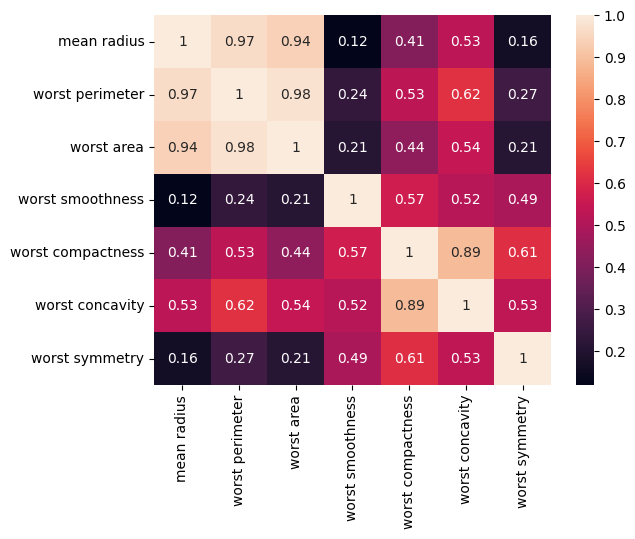

In [46]:
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']

cols = ['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture']

cols = ['mean radius', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', #'worst concave points',
       'worst symmetry']#, 'worst fractal dimension']
sns.heatmap(df_features[cols].corr(), annot=True)

In [117]:
# separa os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(dados_x, dados_y, test_size=0.2)


In [118]:
# padronização dos dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [172]:
# criação do modelo base - Multilayer Perceptron (MLP)
modelo = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu')
#parametro hidden_layer_sizes define quantas camadas haverá no modelo, exemplo (30,30,30), onde haverá 3 camadas com 30 neurônios, cada.

# treino do modelo
modelo.fit(x_train, y_train)

# predição do modelo
y_predict = modelo.predict(x_test)

print(f"Acuracia: {accuracy_score(y_test, y_predict)*100:.2f}%")
print(confusion_matrix(y_test, y_predict))

Acuracia: 97.37%
[[40  1]
 [ 2 71]]
